# Credit Score Prediction Model
Prashamsa Adhikari

KCE080BCT023

# IMPORTING ALL NECESSARY LIBRARIES

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [124]:
df= pd.read_csv(r"C:\Users\lenovo\Downloads\creditscoreprediction.zip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31711 entries, 0 to 31710
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        31711 non-null  int64  
 1   Occupation                 31711 non-null  object 
 2   Annual_Income              31711 non-null  float64
 3   Num_Bank_Accounts          31711 non-null  int64  
 4   Num_Credit_Card            31711 non-null  int64  
 5   Interest_Rate              31711 non-null  int64  
 6   Num_of_Loan                31711 non-null  int64  
 7   Delay_from_due_date        31711 non-null  int64  
 8   Num_of_Delayed_Payment     31711 non-null  int64  
 9   Changed_Credit_Limit       31711 non-null  float64
 10  Num_Credit_Inquiries       31711 non-null  float64
 11  Credit_Mix                 31711 non-null  object 
 12  Outstanding_Debt           31711 non-null  float64
 13  Credit_Utilization_Ratio   31711 non-null  flo

In [125]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_Age_Months'],
      dtype='object')

In [126]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,5,4,6.27,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
1,23,Scientist,19114.12,3,4,3,4,6,0,11.27,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
2,23,Scientist,19114.12,3,4,3,4,3,8,11.27,...,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
3,23,Scientist,19114.12,3,4,3,4,3,6,11.27,...,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
4,28,Teacher,34847.84,2,4,6,1,7,1,7.42,...,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320


# DATA CLEANING/ WRANGLING

# Step 1: Handle duplicates

In [127]:
df = df.drop_duplicates()

# Step 2: Check for missing values

In [128]:
missing_values = df.isnull().sum()

# Step 3: Handle outliers using the IQR method

In [129]:

def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [130]:
numerical_cols = [
    "Age", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
    "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit",
    "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio", 
    "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance", "Credit_History_Age_Months"
]
for col in numerical_cols:
    handle_outliers(df, col)

# Step 4: Encode categorical variables

In [131]:

categorical_cols = ["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 5: Scale numerical features

In [132]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31711 entries, 0 to 31710
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        31711 non-null  float64
 1   Occupation                 31711 non-null  int64  
 2   Annual_Income              31711 non-null  float64
 3   Num_Bank_Accounts          31711 non-null  float64
 4   Num_Credit_Card            31711 non-null  float64
 5   Interest_Rate              31711 non-null  float64
 6   Num_of_Loan                31711 non-null  float64
 7   Delay_from_due_date        31711 non-null  float64
 8   Num_of_Delayed_Payment     31711 non-null  float64
 9   Changed_Credit_Limit       31711 non-null  float64
 10  Num_Credit_Inquiries       31711 non-null  float64
 11  Credit_Mix                 31711 non-null  int64  
 12  Outstanding_Debt           31711 non-null  float64
 13  Credit_Utilization_Ratio   31711 non-null  flo

# Step 6: EDA - Univariate Analysis

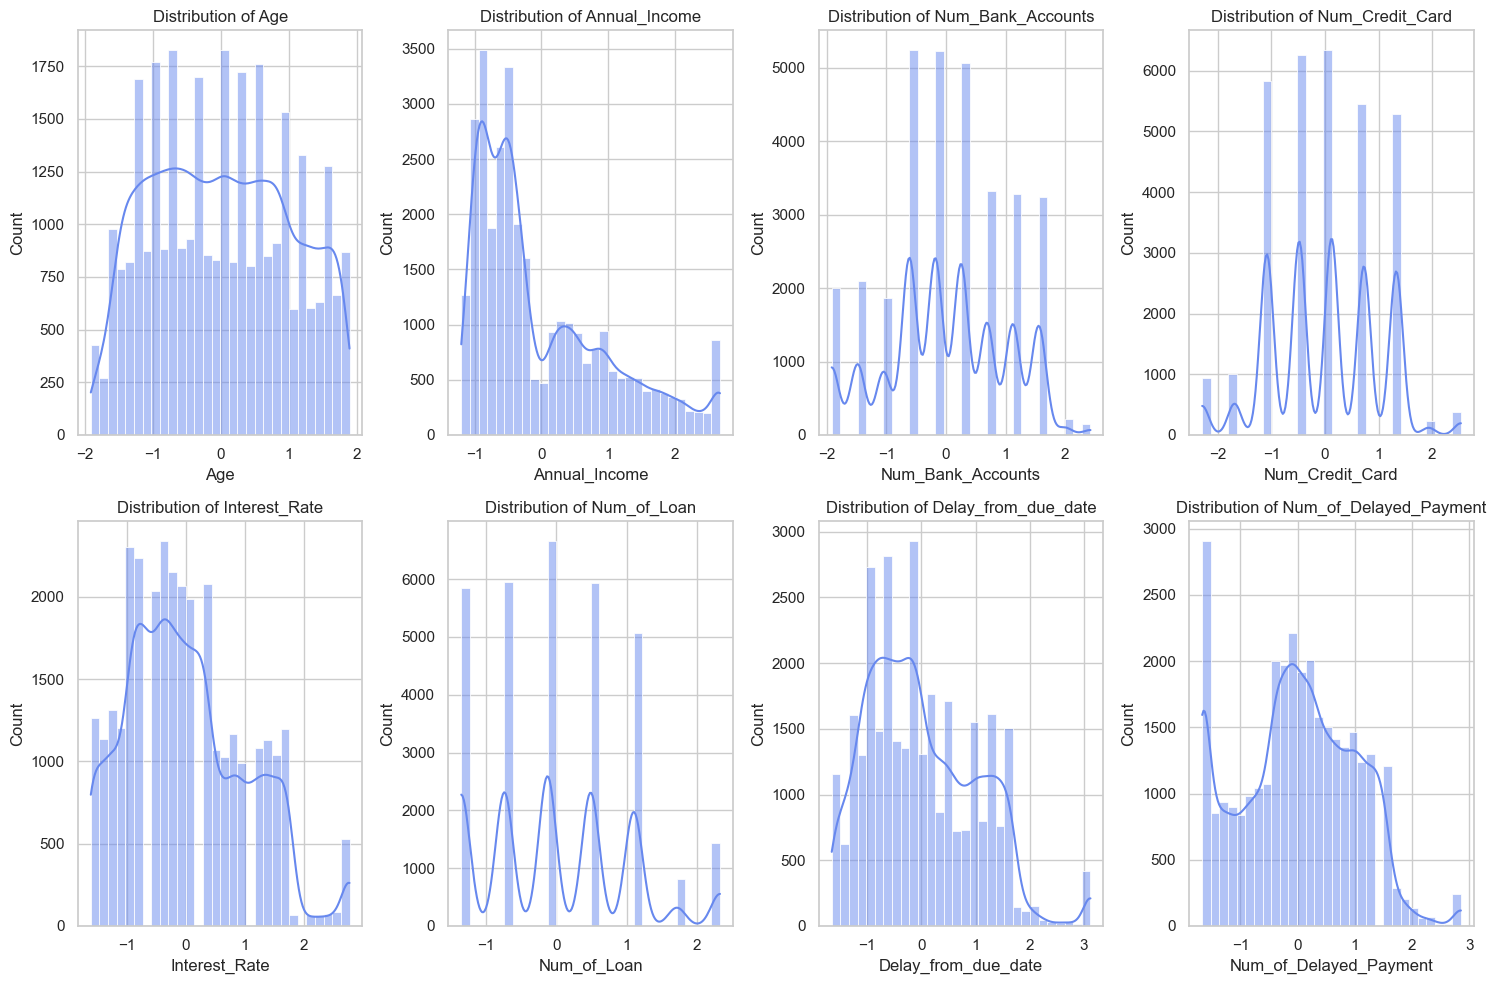

In [134]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:8], 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Step 7: EDA - Bivariate Analysis

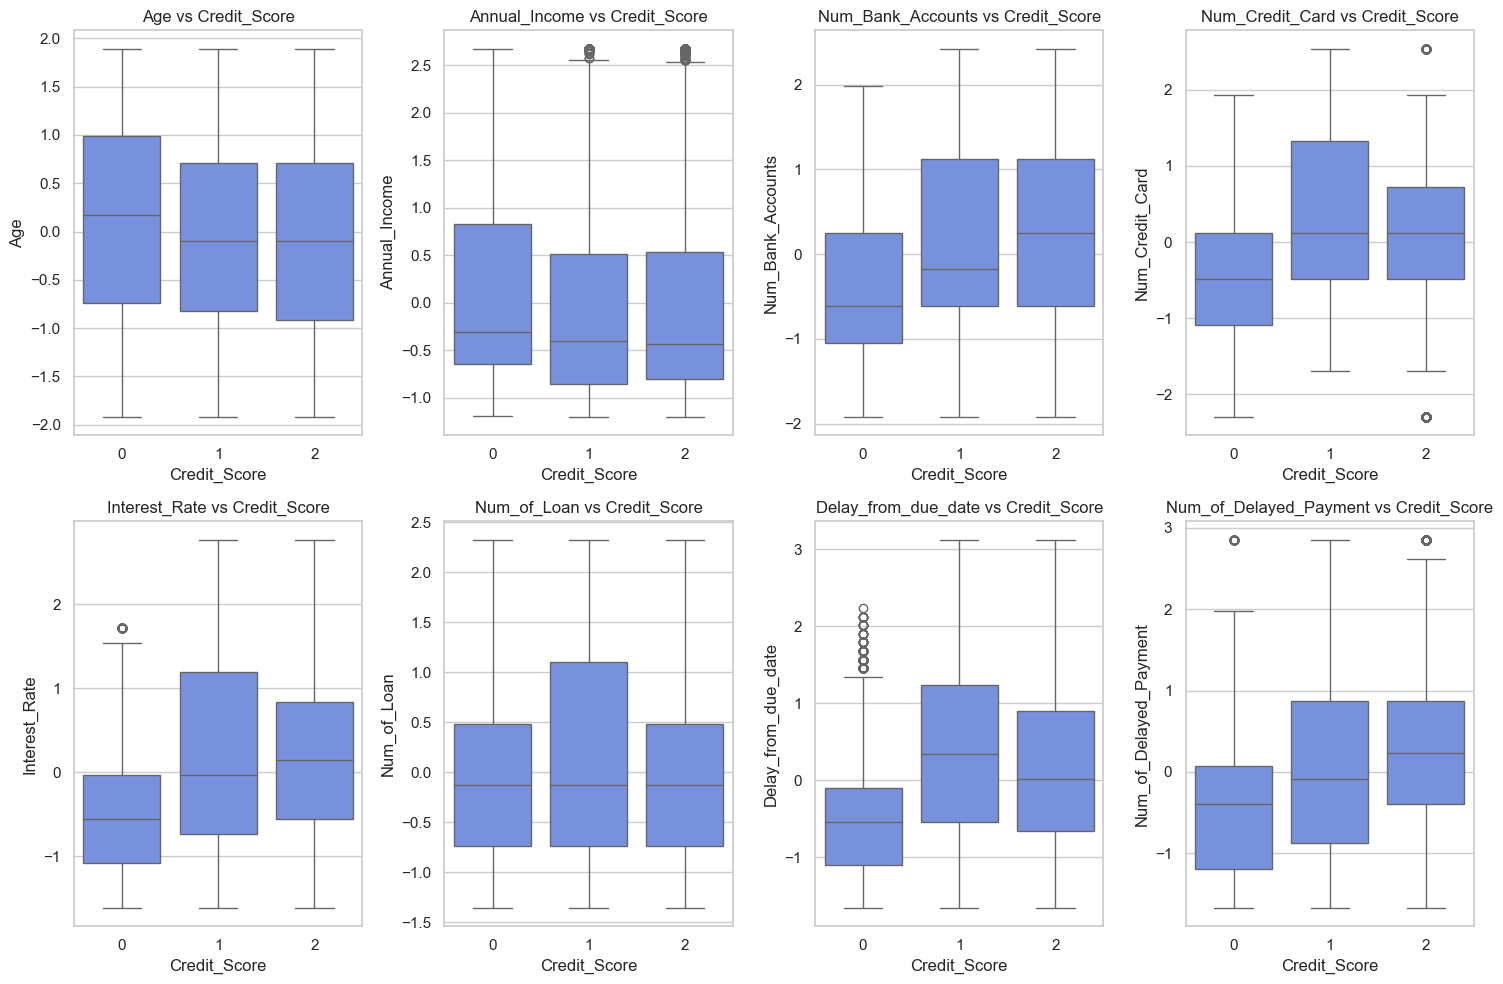

In [135]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:8], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df['Credit_Score'], y=df[col])
    plt.title(f"{col} vs Credit_Score")
plt.tight_layout()
plt.show()

# Setting a Seaborn theme and color palette

In [136]:

sns.set_theme(style="whitegrid")
sns.set_palette("coolwarm")

# Step 6: EDA - Colorful Univariate Analysis

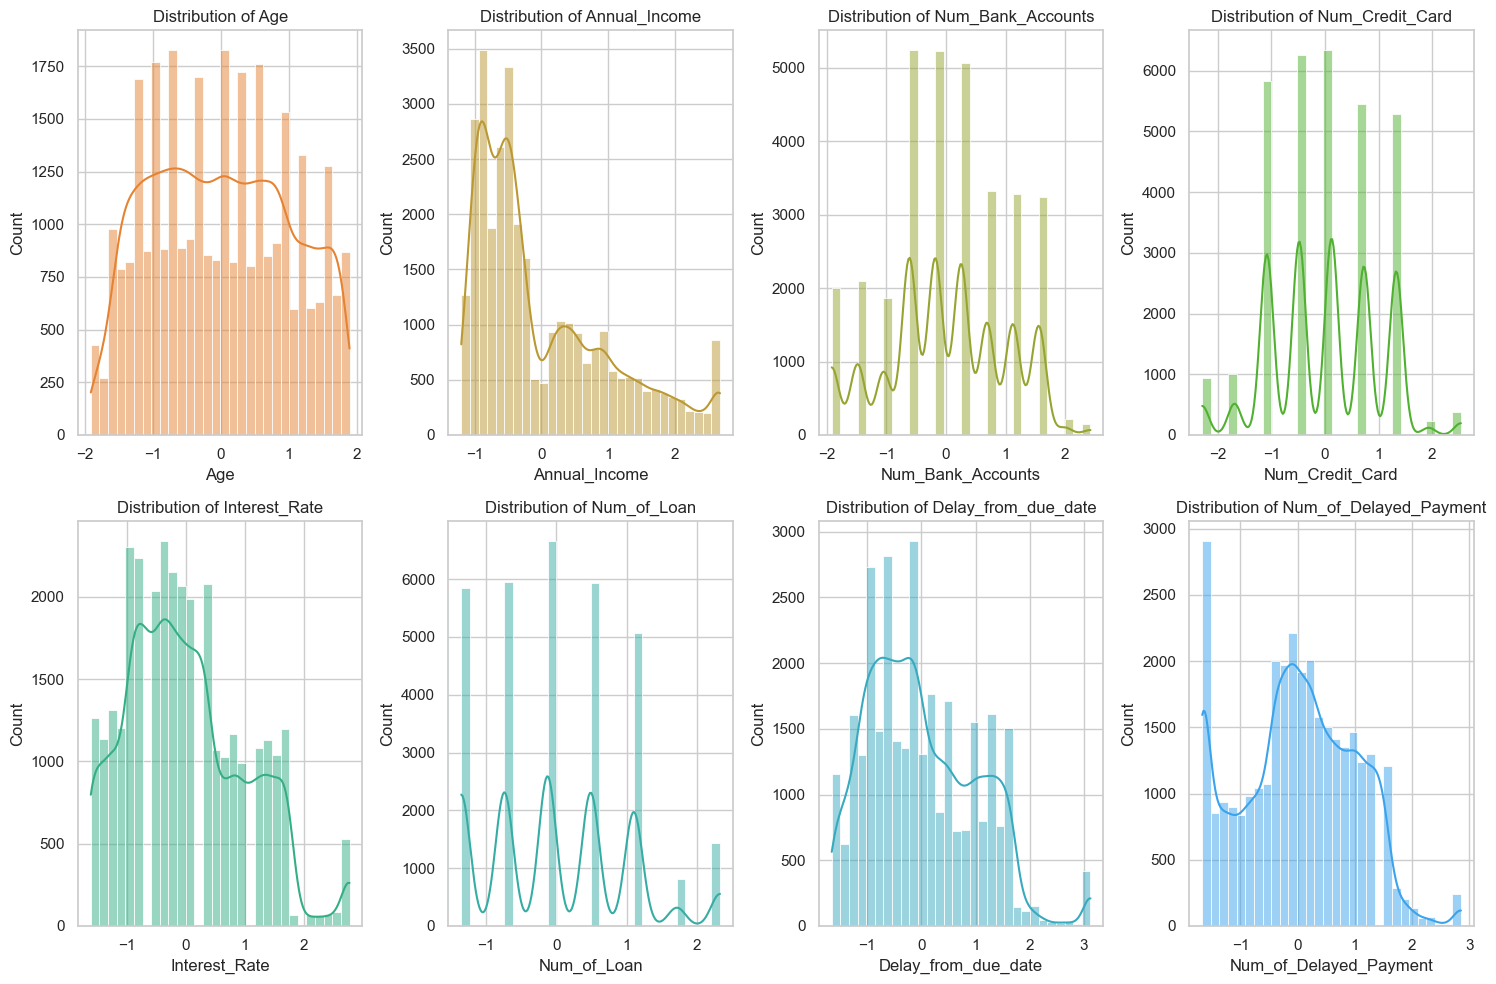

In [137]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:8], 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True, bins=30, color=sns.color_palette("husl", n_colors=12)[i % 12])
    plt.title(f"Distribution of {col}", fontsize=12)
plt.tight_layout()
plt.show()

# Step 7: EDA - Colorful Bivariate Analysis

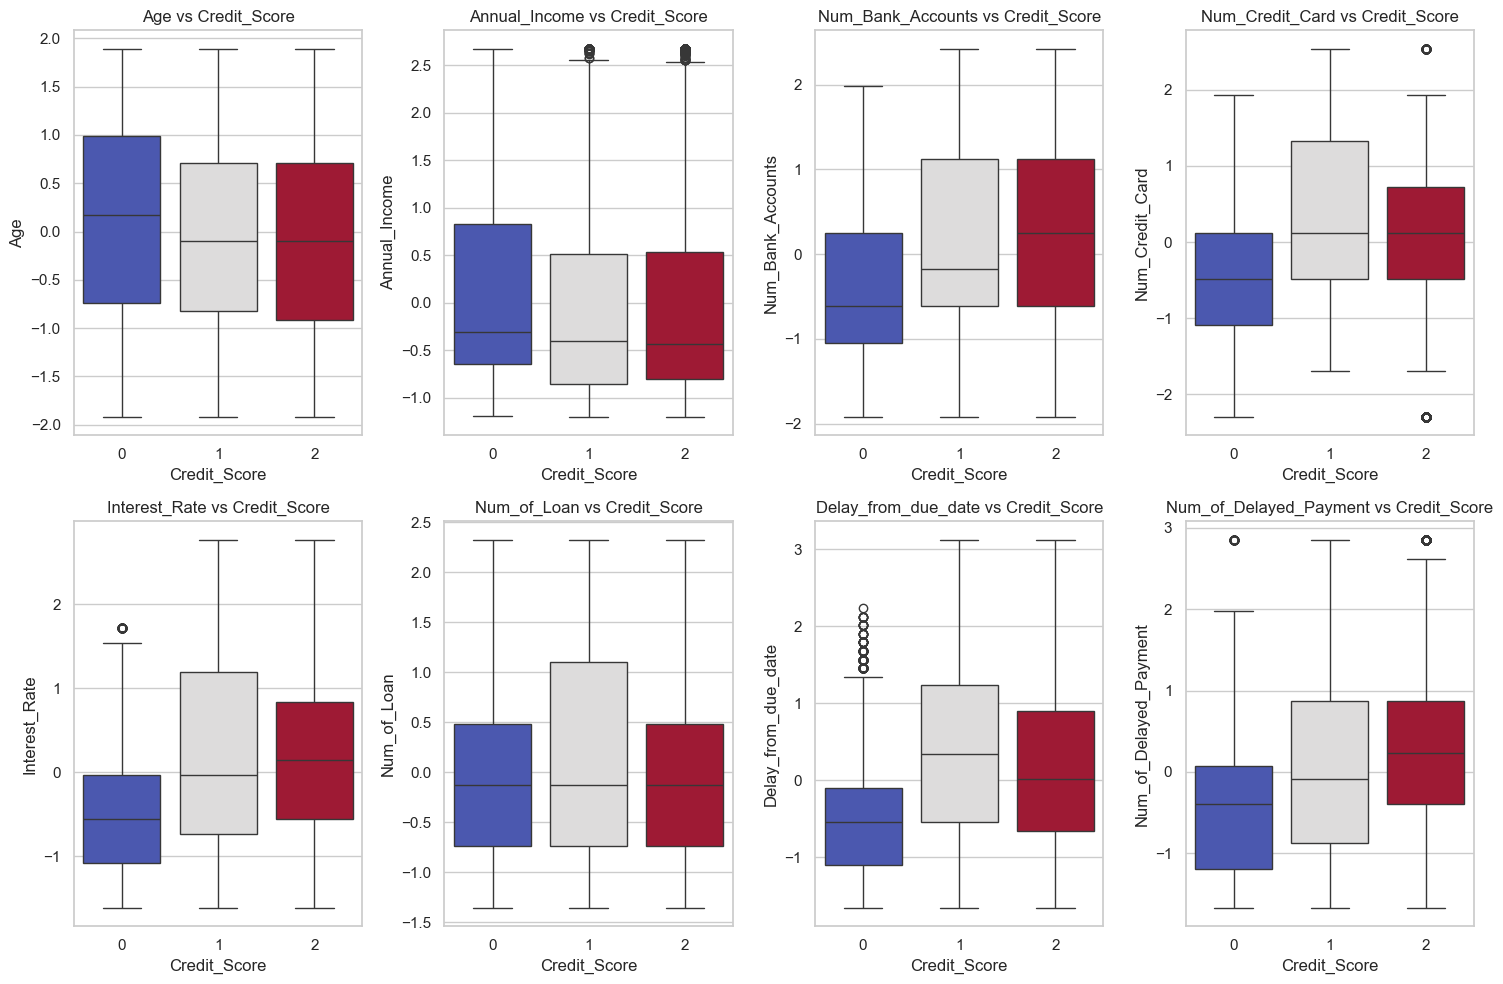

In [138]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:8], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df['Credit_Score'], y=df[col], palette="coolwarm", hue=df['Credit_Score'], legend=False)
    plt.title(f"{col} vs Credit_Score", fontsize=12)
plt.tight_layout()
plt.show()

# Step 8: Correlation Heatmap

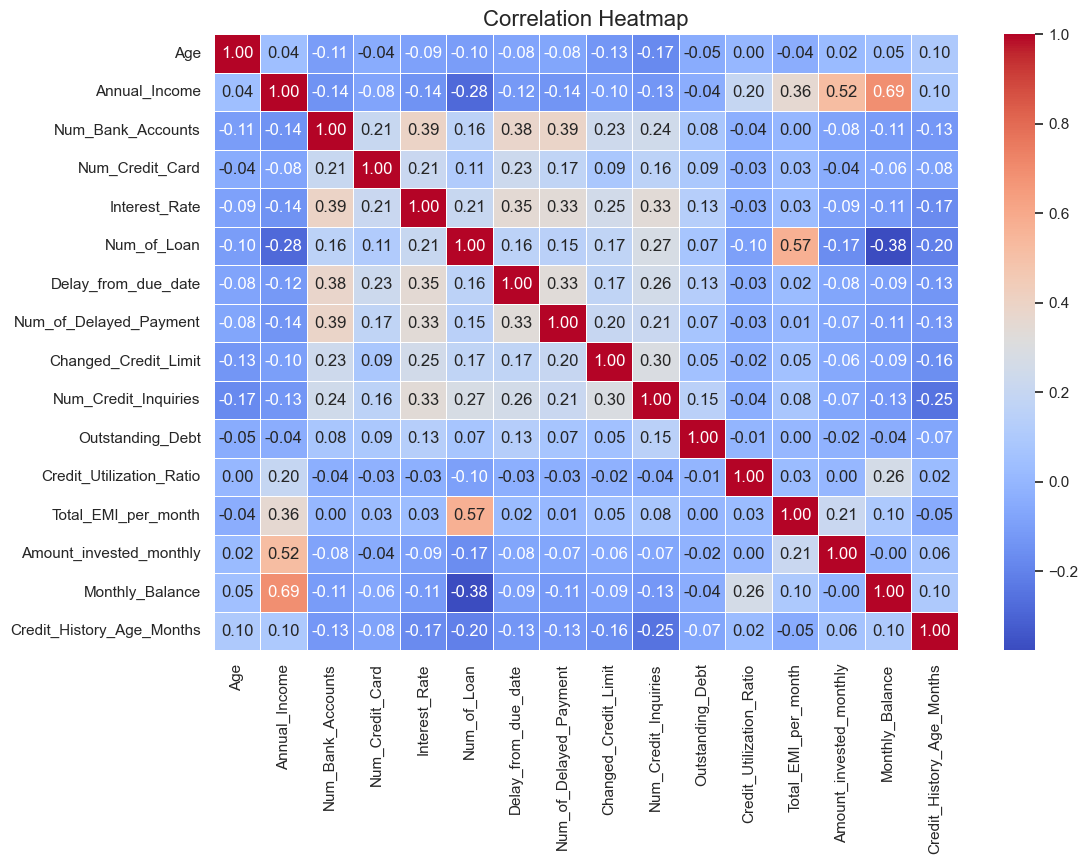

In [139]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


# Forr correlation matrix between all feature matrices
#  Converting target column to numeric for correlation

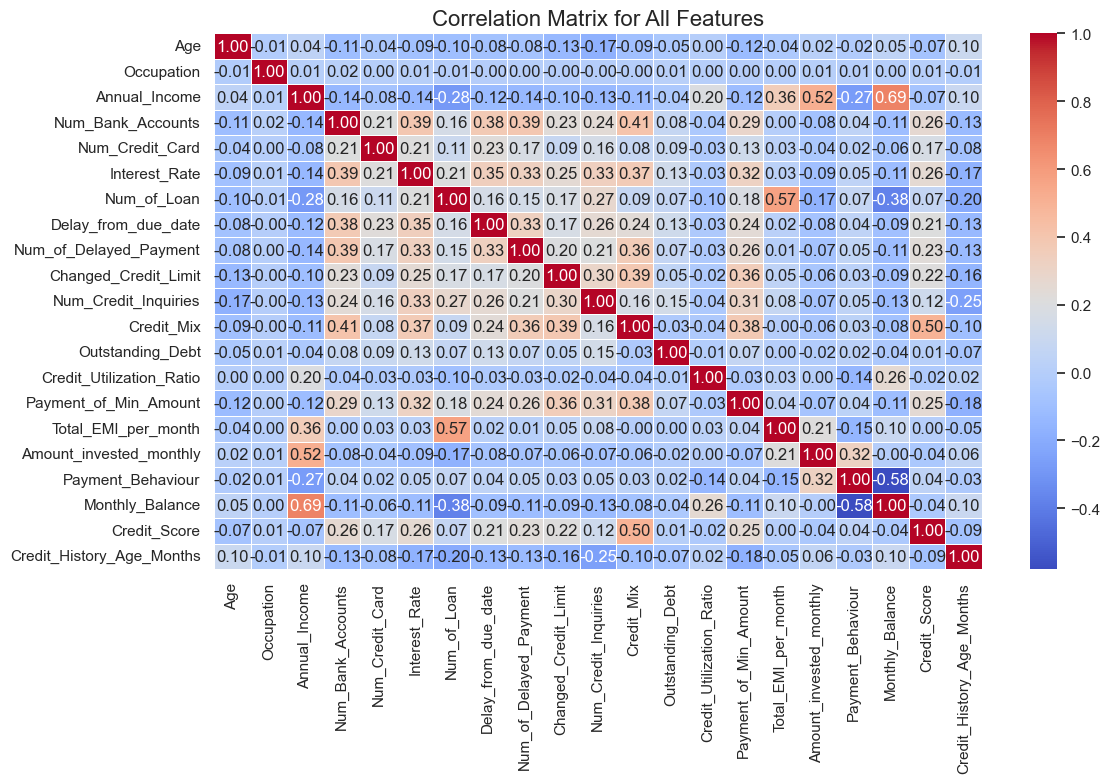

In [140]:
if df['Credit_Score'].dtype == 'object':
    df['Credit_Score'] = LabelEncoder().fit_transform(df['Credit_Score'])

# Step 2: Compute the correlation matrix
correlation_matrix = df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Display correlation values
    cmap="coolwarm",    # Use a colorful palette
    fmt=".2f",          # Format the correlation values
    linewidths=0.5,     # Add grid lines
    cbar=True           # Show the color bar
)
plt.title("Correlation Matrix for All Features", fontsize=16)
plt.tight_layout()
plt.show()


Key Observations in the Correlation Matrix
Diagonal Elements (Value = 1):

The diagonal of the matrix shows correlations of each feature with itself, which is always 1. This is why the main diagonal (from top-left to bottom-right) is filled with 1.0.
Values closer to 1 or -1:  
 1: Strong positive correlation.  
-1: Strong negative correlation.  
 Values closer to 0:  
 Weak or no correlation.

In [141]:
# Get the unique categories in the Credit_Score column and their counts
credit_score_counts = df['Credit_Score'].value_counts()

# Display the total entries and their distribution
total_entries = df['Credit_Score'].count()
print("Total Entries:", total_entries)
print("Credit Score Distribution:")
print(credit_score_counts)


Total Entries: 31711
Credit Score Distribution:
Credit_Score
2    19730
0     7551
1     4430
Name: count, dtype: int64



#  Step 9 : Feature Engineering
Encode categorical variables

In [142]:

cat_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

Encode target

In [143]:
# Encode target
le_target = LabelEncoder()
df['Credit_Score'] = le_target.fit_transform(df['Credit_Score'])


Split features and target

In [144]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize features

In [145]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
# Dropping highly correlated features (threshold > 0.4)
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
while any(upper_tri.max() > 0.4):
    to_drop = upper_tri.max().idxmax()
    df.drop(columns=[to_drop], inplace=True)
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


# Step 10: Initialize models

In [147]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Step 11: Training and evaluation

# For Improved performance

In [150]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_History_Age_Months'],
      dtype='object')

In [151]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
df= pd.read_csv(r"C:\Users\lenovo\Downloads\creditscoreprediction.zip")

# Feature Engineering
df["Debt_to_Income_Ratio"] = df["Outstanding_Debt"] / df["Annual_Income"]
df["Credit_Usage_to_Limit"] = df["Credit_Utilization_Ratio"] * df["Changed_Credit_Limit"]
df["Total_Financial_Behaviour"] = df["Num_Bank_Accounts"] + df["Num_Credit_Card"]
df["Loan_to_Income_Ratio"] = df["Num_of_Loan"] / (df["Annual_Income"] + 1)

# Drop highly correlated features
df = df.drop(columns=["Total_EMI_per_month", "Num_of_Loan", "Monthly_Balance", "Amount_invested_monthly", "Annual_Income"])

# Encode categorical variables
label_encoders = {}
categorical_columns = ["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode target variable
le_target = LabelEncoder()
df["Credit_Score"] = le_target.fit_transform(df["Credit_Score"])

# Define features and target
X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

# Normalize numerical features
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=["int64", "float64"]).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Handle class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8]
}
grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train optimized model
model = XGBClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)


# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Model Accuracy: 88.47%
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3932
           1       0.93      0.91      0.92      3942
           2       0.85      0.85      0.85      3964

    accuracy                           0.88     11838
   macro avg       0.89      0.88      0.88     11838
weighted avg       0.89      0.88      0.88     11838



# Initialize Random Forest model

In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.89


 # XGBoost vs. Random Forest: Theory    
🌲 Random Forest     
Ensemble learning technique that builds multiple decision trees and combines their predictions.    
Uses Bootstrap Aggregating (Bagging) to reduce overfitting.    
Each tree gets a random subset of the training data and features.    
Outputs the average prediction (for regression) or majority vote (for classification).   
Handles large datasets well and reduces variance.   
Less prone to overfitting compared to a single decision tree.   
⚡ XGBoost (Extreme Gradient Boosting)     
Boosting-based ensemble method that builds trees sequentially, correcting errors at each step.    
Uses Gradient Boosting to minimize a loss function efficiently.    
Implements L1 & L2 regularization to prevent overfitting.    
Faster than traditional Gradient Boosting due to parallelization.    
Works well on structured/tabular datasets, even with missing values.    
Requires hyperparameter tuning for optimal performance.    

# Error Calculations

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df= pd.read_csv(r"C:\Users\lenovo\Downloads\creditscoreprediction.zip")

# Encode categorical target variable
label_encoder = LabelEncoder()
df["Credit_Score"] = label_encoder.fit_transform(df["Credit_Score"])

# Select numeric features
features = [
    "Age", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card",
    "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment",
    "Changed_Credit_Limit", "Num_Credit_Inquiries", "Outstanding_Debt",
    "Credit_Utilization_Ratio", "Total_EMI_per_month", "Amount_invested_monthly",
    "Monthly_Balance", "Credit_History_Age_Months"
]
X = df[features]
y = df["Credit_Score"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))
]

# Define Stacking model with Ridge as the meta-model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge(alpha=1.0)
)

# Train the Stacking model
stacking_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Calculate error metrics
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print results
print("Stacking Model Mean Absolute Error (MAE):", mae_stacking)
print("Stacking Model Mean Squared Error (MSE):", mse_stacking)
print("Stacking Model Root Mean Squared Error (RMSE):", rmse_stacking)
print("Stacking Model R-Squared Error (R²):", r2_stacking)




Stacking Model Mean Absolute Error (MAE): 0.4938506907066379
Stacking Model Mean Squared Error (MSE): 0.44930851899068647
Stacking Model Root Mean Squared Error (RMSE): 0.6703047955898022
Stacking Model R-Squared Error (R²): 0.3533063019987258
